In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import scipy.stats as stats
import seaborn as sn

In [2]:
df = pd.read_csv('dataset/titanic.csv')
children = df[df['Age'] < 16]
children.shape

(83, 12)

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x12c30fc10>,
      dtype=object)

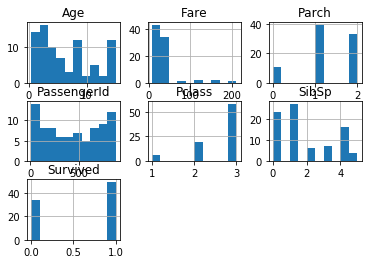

In [3]:
children.hist()

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x12e747ad0>,
      dtype=object)

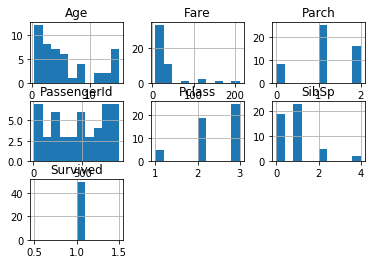

In [4]:
living_children = df[(df['Age'] < 16 ) & (df['Survived'] == 1)]
living_children.hist()

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x12e678d50>,
      dtype=object)

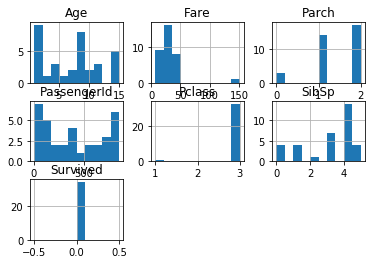

In [5]:
not_surviving_children = df[(df['Age'] < 16 ) & (df['Survived'] == 0)]
not_surviving_children.hist()

In [6]:
# women_and_children = df[(df['Sex'] == 'female') or (df['Age'] < 16)]
# w_a_c_survival_rate = women_and_children['Survived'].vallue_counts(normalize=True) * 100
# w_a_c_survival_rate
women_and_children = df[(df['Sex'] == "female") | (df['Age'] < 16)]
w_a_c_survival_rate = women_and_children['Survived'].value_counts(normalize=True) * 100
w_a_c_survival_rate

1    71.751412
0    28.248588
Name: Survived, dtype: float64

In [7]:
adult_men = df[(df['Sex'].str.match('male')) & (df['Age'] > 16)]
a_m_survival_rate = adult_men['Survived'].value_counts(normalize=True) * 100
a_m_survival_rate

0    82.338308
1    17.661692
Name: Survived, dtype: float64

In [8]:
children_survival_chance = living_children.shape[0] / children.shape[0]
format(children_survival_chance, '.0%')

'59%'

In [9]:
women = df[(df['Sex'] == 'female') & (df['Age'] > 16)]
living_women = df[(df['Sex'] == 'female') & (df['Age'] > 16) & (df['Survived'] == 1)]
women_surival_chance = living_women.shape[0] / women.shape[0]
format(women_surival_chance, '.0%')

'77%'

In [10]:
living_men = adult_men[adult_men['Survived'] == 1]
men_survival_chance = living_men.shape[0] / adult_men.shape[0]
format(men_survival_chance, '.0%')

'18%'

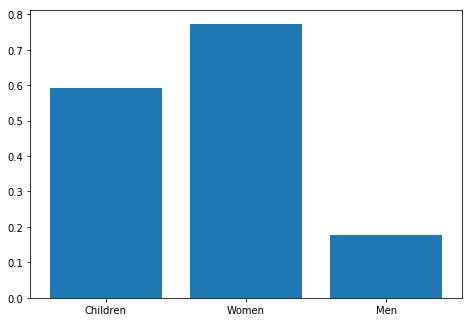

In [25]:
fig = plt.figure()
ax = fig.add_axes([0,0,1,1])
x_axis = ["Children", "Women", "Men"]
data = [children_survival_chance, women_surival_chance, men_survival_chance]
ax.bar(x_axis, data)
plt.show()

In [12]:
living_first_women = women[(women['Survived'] == 1) & (women['Pclass'] == 1)]
living_second_women = women[(women['Survived'] == 1) & (women['Pclass'] == 2)]
living_third_women = women[(women['Survived'] == 1) & (women['Pclass'] == 3)]

first_class_w_chance = living_first_women.shape[0] / living_women.shape[0]
second_class_w_chance = living_second_women.shape[0] / living_women.shape[0]
third_class_w_chance = living_third_women.shape[0] / living_women.shape[0]

print('First class women chance: ' + format(first_class_w_chance, '.0%'))
print('Second class women chance: ' + format(second_class_w_chance, '.0%'))
print('Third class women chance: ' + format(third_class_w_chance, '.0%'))
first_class_w_chance

First class women chance: 47%
Second class women chance: 35%
Third class women chance: 18%


0.4695121951219512

In [13]:
living_first_men = adult_men[(adult_men['Survived'] == 1) & (adult_men['Pclass'] == 1)]
living_second_men = adult_men[(adult_men['Survived'] == 1) & (adult_men['Pclass'] == 2)]
living_third_men = adult_men[(adult_men['Sur vived'] == 1) & (adult_men['Pclass'] == 3)]

first_class_m_chance = living_first_men.shape[0] / living_men.shape[0]
second_class_m_chance = living_second_men.shape[0] / living_men.shape[0]
third_class_m_chance = living_third_men.shape[0] / living_men.shape[0]

print('First class men chance: ' + format(first_class_m_chance, '.0%'))
print('Second class men chance: ' + format(second_class_m_chance, '.0%'))
print('Third class men chance: ' + format(third_class_m_chance, '.0%'))

First class men chance: 52%
Second class men chance: 8%
Third class men chance: 39%


In [14]:
living_men.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,71.000000,71.0,71.000000,71.000000,71.000000,71.000000,71.000000
mean,485.267606,1.0,1.873239,34.323944,0.267606,0.126761,46.731869
std,222.128789,0.0,0.955130,11.798032,0.476827,0.411602,85.316448
min,22.000000,1.0,1.000000,17.000000,0.000000,0.000000,0.000000
25%,288.000000,1.0,1.000000,26.500000,0.000000,0.000000,8.050000
50%,513.000000,1.0,1.000000,32.000000,0.000000,0.000000,26.550000
75%,654.500000,1.0,3.000000,41.000000,0.500000,0.000000,54.270850
max,890.000000,1.0,3.000000,80.000000,2.000000,2.000000,512.329200


In [15]:
dead_men = df[(df['Sex'] == "male") & (df['Age'] > 16) & (df['Survived'] == 0)]
dead_men.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,331.000000,331.0,331.000000,331.000000,331.000000,331.000000,331.000000
mean,446.972810,0.0,2.383686,33.496979,0.250755,0.166163,22.562523
std,260.482075,0.0,0.779028,12.970596,0.516947,0.566384,33.570494
min,1.000000,0.0,1.000000,17.000000,0.000000,0.000000,0.000000
25%,212.000000,0.0,2.000000,23.000000,0.000000,0.000000,7.854200
50%,443.000000,0.0,3.000000,30.000000,0.000000,0.000000,10.170800
75%,680.000000,0.0,3.000000,40.500000,0.000000,0.000000,26.000000
max,891.000000,0.0,3.000000,74.000000,3.000000,5.000000,263.000000


In [16]:
first_class_men = adult_men[adult_men['Pclass'] == 1]
first_class_men_rate = first_class_men['Survived'].value_counts(normalize=True) * 100
first_class_men_rate

0    62.244898
1    37.755102
Name: Survived, dtype: float64

In [17]:
third_class_men = adult_men[adult_men['Pclass'] == 3]
third_class_men_rate = third_class_men['Survived'].value_counts(normalize=True) * 100
third_class_men_rate

0    87.037037
1    12.962963
Name: Survived, dtype: float64

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x12eea3650>,
      dtype=object)

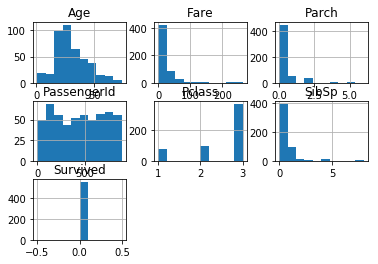

In [18]:
the_dead = df[df['Survived'] == 0]
the_dead.hist()

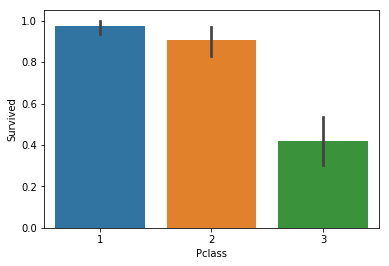

In [19]:
sn.barplot(x='Pclass', y='Survived', data=women)

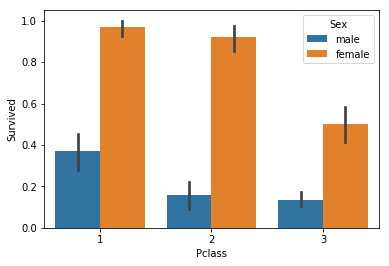

In [20]:
sn.barplot(x='Pclass', y='Survived', hue="Sex", data=df)

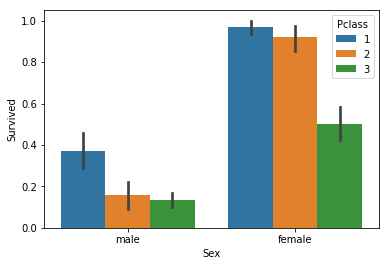

In [21]:
sn.barplot(x='Sex', y='Survived', hue="Pclass", data=df)

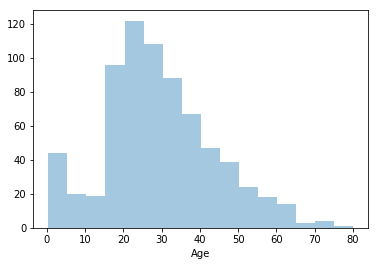

In [22]:
ls_age = df['Age'].dropna()
sn.distplot(ls_age, hist=True, kde=False, bins=16)

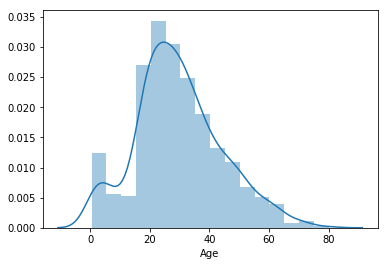

In [23]:
sn.distplot(df['Age'].dropna(), hist=True, kde=True, bins=16)

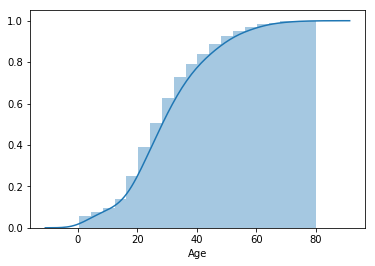

In [24]:
sn.distplot(df['Age'].dropna(), hist_kws=dict(cumulative=True), kde_kws=dict(cumulative=True))